In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import naive_bayes, neighbors, svm
from sklearn.preprocessing import PolynomialFeatures
from dtreeviz.trees import dtreeviz
from sklearn import tree

In [2]:
df = pd.read_csv('Empatie_arta.csv')
df

,Marcaj de timp,Prin bifarea opțiunii de mai jos vă exprimați acordul pentru participarea la acest studiu în condițiile menționate anterior.,1. Simt emoţiile altora.,2. Sufăr și eu când aud de necazurile altora.,3. Sunt profund mişcat(ă) de necazurile altora.,4. Sunt atât de ușor de impresionat încât plâng.,5. Plâng cu uşurință.,"6. Atunci când resimt emoţii, sentimente, acestea sunt foarte intense.",7. Mă simt conectat(ă) spiritual cu ceilalți oameni.,8. Nu îi înţeleg pe cei care devin emoţionali.,...,14. Iubesc florile.,15. Îmi place frumuseţea naturii.,16. Nu-mi place arta.,17. Nu-mi place poezia.,18. Nu-mi plac vizitele la muzeele de artă.,19. Nu-mi plac concertele.,10. Nu-mi place să privesc la balet sau la dans sportiv.,Genul,Vârsta (în ani împliniți).,Nivelul venitului
0,2022/11/20 2:04:32 p.m. EET,"Am peste 18 ani, citit și sunt de acord cu par...",4,2,2,1,3,2,1,4,...,1,4,1,3,1,5,4,Masculin,37,peste 10.000 lei net/ lună
1,2022/11/20 2:05:30 p.m. EET,"Am peste 18 ani, citit și sunt de acord cu par...",5,5,5,4,3,4,3,2,...,5,5,1,1,3,1,2,Feminin,40,3.000 - 10.000 lei net/ lună
2,2022/11/20 2:08:46 p.m. EET,"Am peste 18 ani, citit și sunt de acord cu par...",5,4,3,4,4,5,5,1,...,3,5,1,3,2,1,1,Feminin,40,peste 10.000 lei net/ lună
3,2022/11/20 2:09:56 p.m. EET,"Am peste 18 ani, citit și sunt de acord cu par...",4,3,3,2,1,4,2,2,...,2,5,1,2,1,2,1,Masculin,41,3.000 - 10.000 lei net/ lună
4,2022/11/20 2:16:17 p.m. EET,"Am peste 18 ani, citit și sunt de acord cu par...",5,4,4,3,2,4,4,1,...,4,4,1,2,2,2,2,Feminin,36,3.000 - 10.000 lei net/ lună
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2022/11/21 7:44:41 a.m. EET,"Am peste 18 ani, am citit și sunt de acord cu ...",5,4,3,4,4,5,4,1,...,5,5,1,1,1,1,1,Feminin,34,3.000 - 10.000 lei net/ lună
72,2022/11/21 8:37:01 a.m. EET,"Am peste 18 ani, am citit și sunt de acord cu ...",3,4,4,3,3,3,2,1,...,2,4,1,1,1,1,1,Feminin,30,3.000 - 10.000 lei net/ lună
73,2022/11/21 10:54:43 a.m. EET,"Am peste 18 ani, am citit și sunt de acord cu ...",3,4,3,4,5,4,2,3,...,5,5,4,4,4,3,3,Feminin,73,sub 3.000 lei net/ lună
74,2022/11/21 10:59:16 a.m. EET,"Am peste 18 ani, am citit și sunt de acord cu ...",2,2,3,2,2,3,1,4,...,4,5,2,3,1,4,4,Masculin,43,peste 10.000 lei net/ lună


In [6]:
df.columns

Index(['Marcaj de timp',
       'Prin bifarea opțiunii de mai jos vă exprimați acordul pentru participarea la acest studiu în condițiile menționate anterior.',
       '1. Simt emoţiile altora.',
       '2. Sufăr și eu când aud de necazurile altora.',
       '3. Sunt profund mişcat(ă) de necazurile altora.',
       '4. Sunt atât de ușor de impresionat încât plâng.',
       '5. Plâng cu uşurință.',
       '6. Atunci când resimt emoţii, sentimente, acestea sunt foarte intense.',
       '7. Mă simt conectat(ă) spiritual cu ceilalți oameni.',
       '8. Nu îi înţeleg pe cei care devin emoţionali.',
       '9. Nu mă interesează problemele altora.',
       '10. Doar rareori devin emoțional(ă).', '11. Cred în importanţa artei.',
       '12. Îmi place muzica.',
       '13. Găsesc frumuseţea acolo unde poate alţii nu o văd.',
       '14. Iubesc florile.', '15. Îmi place frumuseţea naturii.',
       '16. Nu-mi place arta.', '17. Nu-mi place poezia. ',
       '18. Nu-mi plac vizitele la muzeele de

In [7]:
column_name = ['datetime', 
               'consent', 
               'simt_emotiile_altora', 
               'sufar_de_necazul_altora', 
               'miscat_de_necazul_altora', 
               'usor_de_impresionat', 
               'plang_usor', 
               'simt_emotii_intense', 
               'conectat_spiritual_cu_altii', 
               'nu_inteleg_emotia', 
               'sunt_indiferent', 
               'rar_sunt_emotional', 
               'cred_in_arta', 
               'love_music', 
               'geasesc_frumusete_in_orice', 
               'iubesc_florile', 
               'imi_place_natura', 
               'nu_mi_place_arta', 
               'nu_mi_place_poezia', 
               'nu_mi_place_la_muzee', 
               'nu_mi_plac_concertele', 
               'nu_mi_place_balet_dans_sportiv', 
               'gen', 
               'varsta', 
               'venit']

In [13]:
df.columns = column_name

In [14]:
df2 = df.drop(['datetime', 'consent'], axis = 1)

In [15]:
df2.head(5)

,simt_emotiile_altora,sufar_de_necazul_altora,miscat_de_necazul_altora,usor_de_impresionat,plang_usor,simt_emotii_intense,conectat_spiritual_cu_altii,nu_inteleg_emotia,sunt_indiferent,rar_sunt_emotional,...,iubesc_florile,imi_place_natura,nu_mi_place_arta,nu_mi_place_poezia,nu_mi_place_la_muzee,nu_mi_plac_concertele,nu_mi_place_balet_dans_sportiv,gen,varsta,venit
0,4,2,2,1,3,2,1,4,3,4,...,1,4,1,3,1,5,4,Masculin,37,peste 10.000 lei net/ lună
1,5,5,5,4,3,4,3,2,1,1,...,5,5,1,1,3,1,2,Feminin,40,3.000 - 10.000 lei net/ lună
2,5,4,3,4,4,5,5,1,1,3,...,3,5,1,3,2,1,1,Feminin,40,peste 10.000 lei net/ lună
3,4,3,3,2,1,4,2,2,2,3,...,2,5,1,2,1,2,1,Masculin,41,3.000 - 10.000 lei net/ lună
4,5,4,4,3,2,4,4,1,2,2,...,4,4,1,2,2,2,2,Feminin,36,3.000 - 10.000 lei net/ lună


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   simt_emotiile_altora            76 non-null     int64 
 1   sufar_de_necazul_altora         76 non-null     int64 
 2   miscat_de_necazul_altora        76 non-null     int64 
 3   usor_de_impresionat             76 non-null     int64 
 4   plang_usor                      76 non-null     int64 
 5   simt_emotii_intense             76 non-null     int64 
 6   conectat_spiritual_cu_altii     76 non-null     int64 
 7   nu_inteleg_emotia               76 non-null     int64 
 8   sunt_indiferent                 76 non-null     int64 
 9   rar_sunt_emotional              76 non-null     int64 
 10  cred_in_arta                    76 non-null     int64 
 11  love_music                      76 non-null     int64 
 12  geasesc_frumusete_in_orice      76 non-null     int6

In [19]:
df2.varsta.value_counts().sort_values()

73     1
68     1
24     1
67     1
55     1
52     1
31     1
21     1
28     1
49     1
53     1
44     2
30     2
48     2
42     2
34     2
46     2
29     2
36     3
38     3
32     3
45     4
43     4
33     4
37     4
39     5
20     5
41     6
40    10
Name: varsta, dtype: int64

In [22]:
profile = ProfileReport(df2)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# data visualization

In [24]:
df2.corr()

,simt_emotiile_altora,sufar_de_necazul_altora,miscat_de_necazul_altora,usor_de_impresionat,plang_usor,simt_emotii_intense,conectat_spiritual_cu_altii,nu_inteleg_emotia,sunt_indiferent,rar_sunt_emotional,...,love_music,geasesc_frumusete_in_orice,iubesc_florile,imi_place_natura,nu_mi_place_arta,nu_mi_place_poezia,nu_mi_place_la_muzee,nu_mi_plac_concertele,nu_mi_place_balet_dans_sportiv,varsta
simt_emotiile_altora,1.000000,0.364736,0.310323,0.135426,0.015242,0.293839,0.436850,-0.352901,-0.195231,-0.259105,...,0.178393,0.344776,0.105149,0.119462,-0.209892,-0.063184,-0.053448,-0.282905,-0.189734,-0.023238
sufar_de_necazul_altora,0.364736,1.000000,0.704769,0.488411,0.311395,0.361733,0.488048,-0.389477,-0.421707,-0.320647,...,0.133800,0.373379,0.443524,0.219458,-0.130738,-0.376918,-0.210326,-0.400511,-0.270104,-0.011766
miscat_de_necazul_altora,0.310323,0.704769,1.000000,0.417022,0.281841,0.449291,0.394970,-0.270652,-0.519173,-0.457138,...,0.126962,0.267134,0.402115,0.086428,-0.451579,-0.335755,-0.216401,-0.293036,-0.191245,0.071632
usor_de_impresionat,0.135426,0.488411,0.417022,1.000000,0.735617,0.464657,0.471547,-0.318001,-0.174601,-0.443758,...,0.056675,0.320220,0.291262,0.131204,-0.093744,-0.242825,-0.215059,-0.317658,-0.336403,0.017861
plang_usor,0.015242,0.311395,0.281841,0.735617,1.000000,0.522089,0.298489,-0.335661,-0.190004,-0.473212,...,-0.065689,0.027153,0.157569,-0.009198,-0.066217,-0.139339,-0.204150,-0.270388,-0.261398,-0.044504
simt_emotii_intense,0.293839,0.361733,0.449291,0.464657,0.522089,1.000000,0.367197,-0.325694,-0.325478,-0.406993,...,0.021177,0.285351,0.200079,0.134627,-0.378235,-0.319095,-0.231987,-0.292608,-0.421288,-0.016687
conectat_spiritual_cu_altii,0.436850,0.488048,0.394970,0.471547,0.298489,0.367197,1.000000,-0.470078,-0.443202,-0.397280,...,0.255595,0.468026,0.335316,0.199936,-0.140742,-0.227739,-0.341181,-0.333562,-0.338269,0.001543
nu_inteleg_emotia,-0.352901,-0.389477,-0.270652,-0.318001,-0.335661,-0.325694,-0.470078,1.000000,0.392209,0.369966,...,-0.083380,-0.240502,-0.068174,-0.036321,0.034243,0.173055,0.185931,0.369465,0.247362,0.172930
sunt_indiferent,-0.195231,-0.421707,-0.519173,-0.174601,-0.190004,-0.325478,-0.443202,0.392209,1.000000,0.463072,...,-0.241416,-0.288378,-0.273724,-0.162968,0.525175,0.478701,0.339093,0.378932,0.308796,0.044726
rar_sunt_emotional,-0.259105,-0.320647,-0.457138,-0.443758,-0.473212,-0.406993,-0.397280,0.369966,0.463072,1.000000,...,-0.121842,-0.153334,-0.156979,0.067919,0.260144,0.345122,0.275426,0.380472,0.326353,0.052498


<AxesSubplot:>

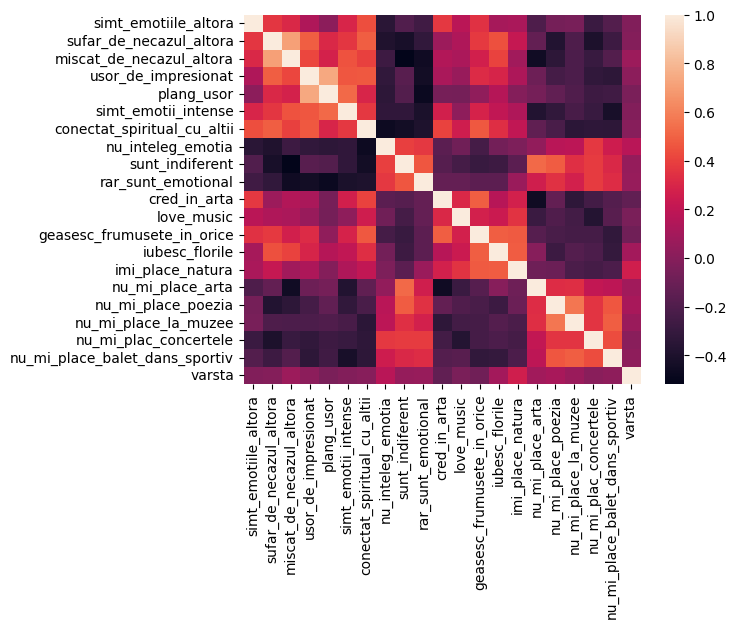

In [27]:
sns.heatmap(df2.corr())

In [28]:
df2.columns

Index(['simt_emotiile_altora', 'sufar_de_necazul_altora',
       'miscat_de_necazul_altora', 'usor_de_impresionat', 'plang_usor',
       'simt_emotii_intense', 'conectat_spiritual_cu_altii',
       'nu_inteleg_emotia', 'sunt_indiferent', 'rar_sunt_emotional',
       'cred_in_arta', 'love_music', 'geasesc_frumusete_in_orice',
       'iubesc_florile', 'imi_place_natura', 'nu_mi_place_arta',
       'nu_mi_place_poezia', 'nu_mi_place_la_muzee', 'nu_mi_plac_concertele',
       'nu_mi_place_balet_dans_sportiv', 'gen', 'varsta', 'venit'],
      dtype='object')

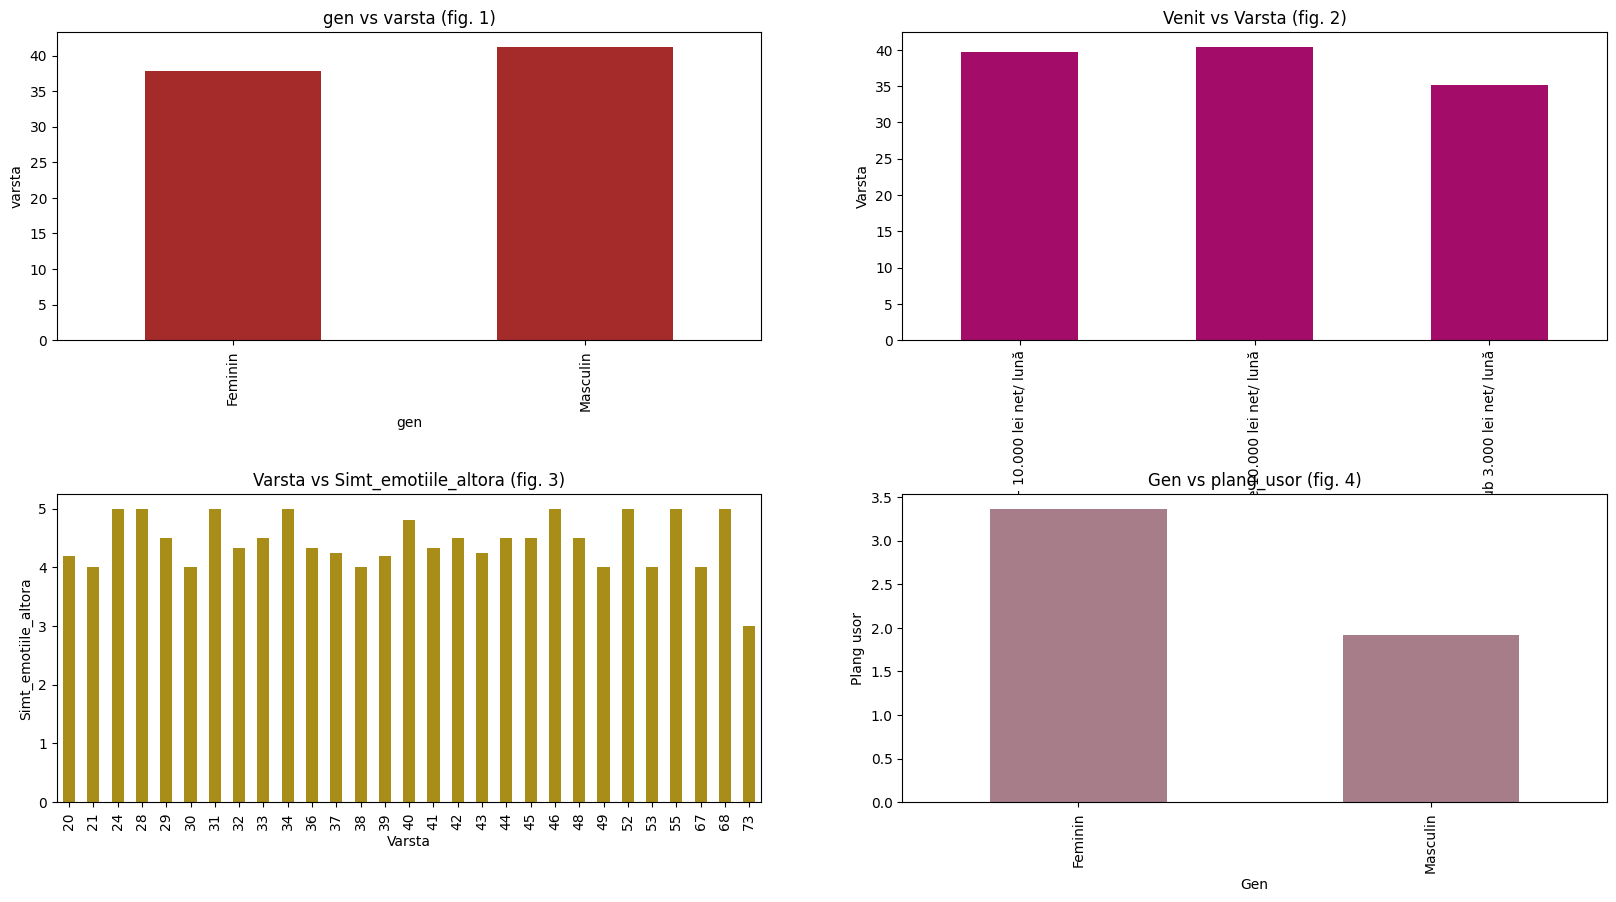

In [29]:
# plot views
# Gender vs Varsta worked per week

fig, axes = plt.subplots(2,2, figsize=(20, 10))

df2.groupby(by="gen")['varsta'].mean().plot(ax= axes[0][0],
                                            kind = 'bar',
                                            xlabel = 'gen',
                                            ylabel = 'varsta',
                                            title = 'gen vs varsta (fig. 1)',
                                            color = 'brown',
                                           )

# Income vs age

df2.groupby('venit')['varsta'].mean().plot(ax= axes[0][1],
                                           kind = 'bar',
                                           xlabel = 'Venit',
                                           ylabel = 'Varsta',
                                           title = 'Venit vs Varsta (fig. 2)',
                                           color = '#a30d69',
                                          )

# Varsta vs Simt_emotiile_altora

df2.groupby('varsta')['simt_emotiile_altora'].mean().plot(ax= axes[1][0],
                                                          kind = 'bar',
                                                          xlabel = 'Varsta',
                                                          ylabel = 'Simt_emotiile_altora', 
                                                    title = 'Varsta vs Simt_emotiile_altora (fig. 3)', 
                                                    color = '#a98d19',
                                                    )

# Gen vs plang_usor

df2.groupby('gen')['plang_usor'].mean().plot(ax= axes[1][1],
                                                            kind = 'bar', 
                                                            xlabel = 'Gen', 
                                                            ylabel = 'Plang usor', 
                                                            title = 'Gen vs plang_usor (fig. 4)', 
                                                            color = '#a67d89',
                                                            )

plt.subplots_adjust(hspace=0.5)
plt.show()

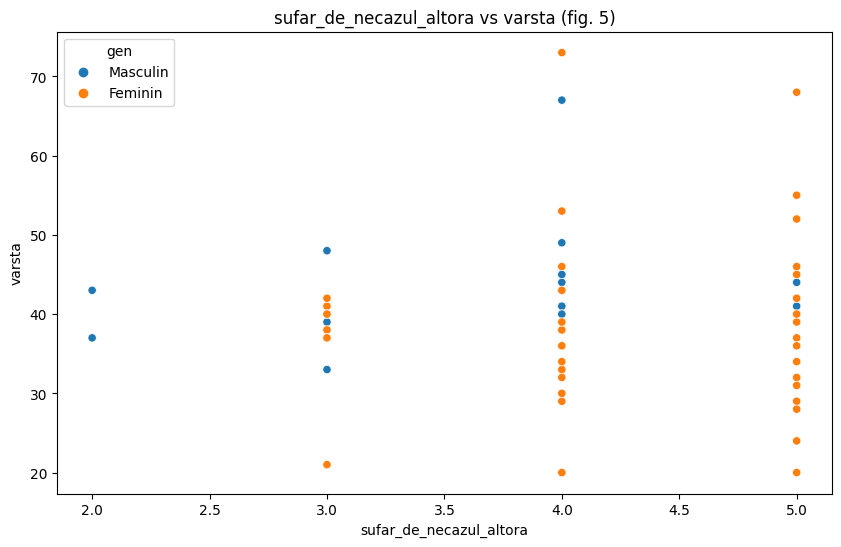

<Figure size 640x480 with 0 Axes>

In [31]:
# plot view of how many hours a female or male works, depending on their age

plt.figure(figsize=(10,6))

plt.title('sufar_de_necazul_altora vs varsta (fig. 5)')
sns.scatterplot(x=df2['sufar_de_necazul_altora'],y=df2['varsta'], hue=df2['gen'])
plt.xlabel('sufar_de_necazul_altora')
plt.ylabel('varsta')

plt.show()
plt.tight_layout()

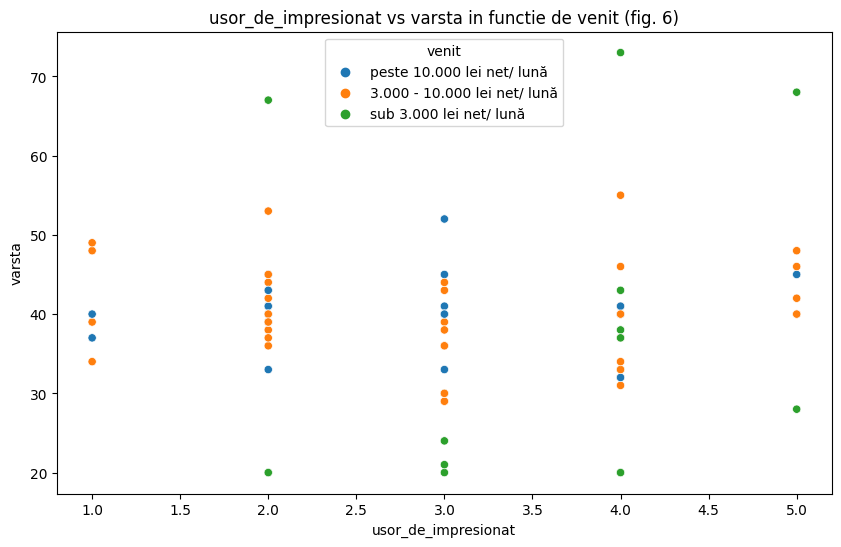

<Figure size 640x480 with 0 Axes>

In [32]:
# income plot view of workclass depending on education

plt.figure(figsize=(10,6))

plt.title('usor_de_impresionat vs varsta in functie de venit (fig. 6)')
sns.scatterplot(x=df2['usor_de_impresionat'].sort_values(),y=df2['varsta'].sort_values(), hue=df2['venit'])
plt.xlabel('usor_de_impresionat')
plt.ylabel('varsta')

plt.show()
plt.tight_layout()

In [33]:
df2.columns

Index(['simt_emotiile_altora', 'sufar_de_necazul_altora',
       'miscat_de_necazul_altora', 'usor_de_impresionat', 'plang_usor',
       'simt_emotii_intense', 'conectat_spiritual_cu_altii',
       'nu_inteleg_emotia', 'sunt_indiferent', 'rar_sunt_emotional',
       'cred_in_arta', 'love_music', 'geasesc_frumusete_in_orice',
       'iubesc_florile', 'imi_place_natura', 'nu_mi_place_arta',
       'nu_mi_place_poezia', 'nu_mi_place_la_muzee', 'nu_mi_plac_concertele',
       'nu_mi_place_balet_dans_sportiv', 'gen', 'varsta', 'venit'],
      dtype='object')

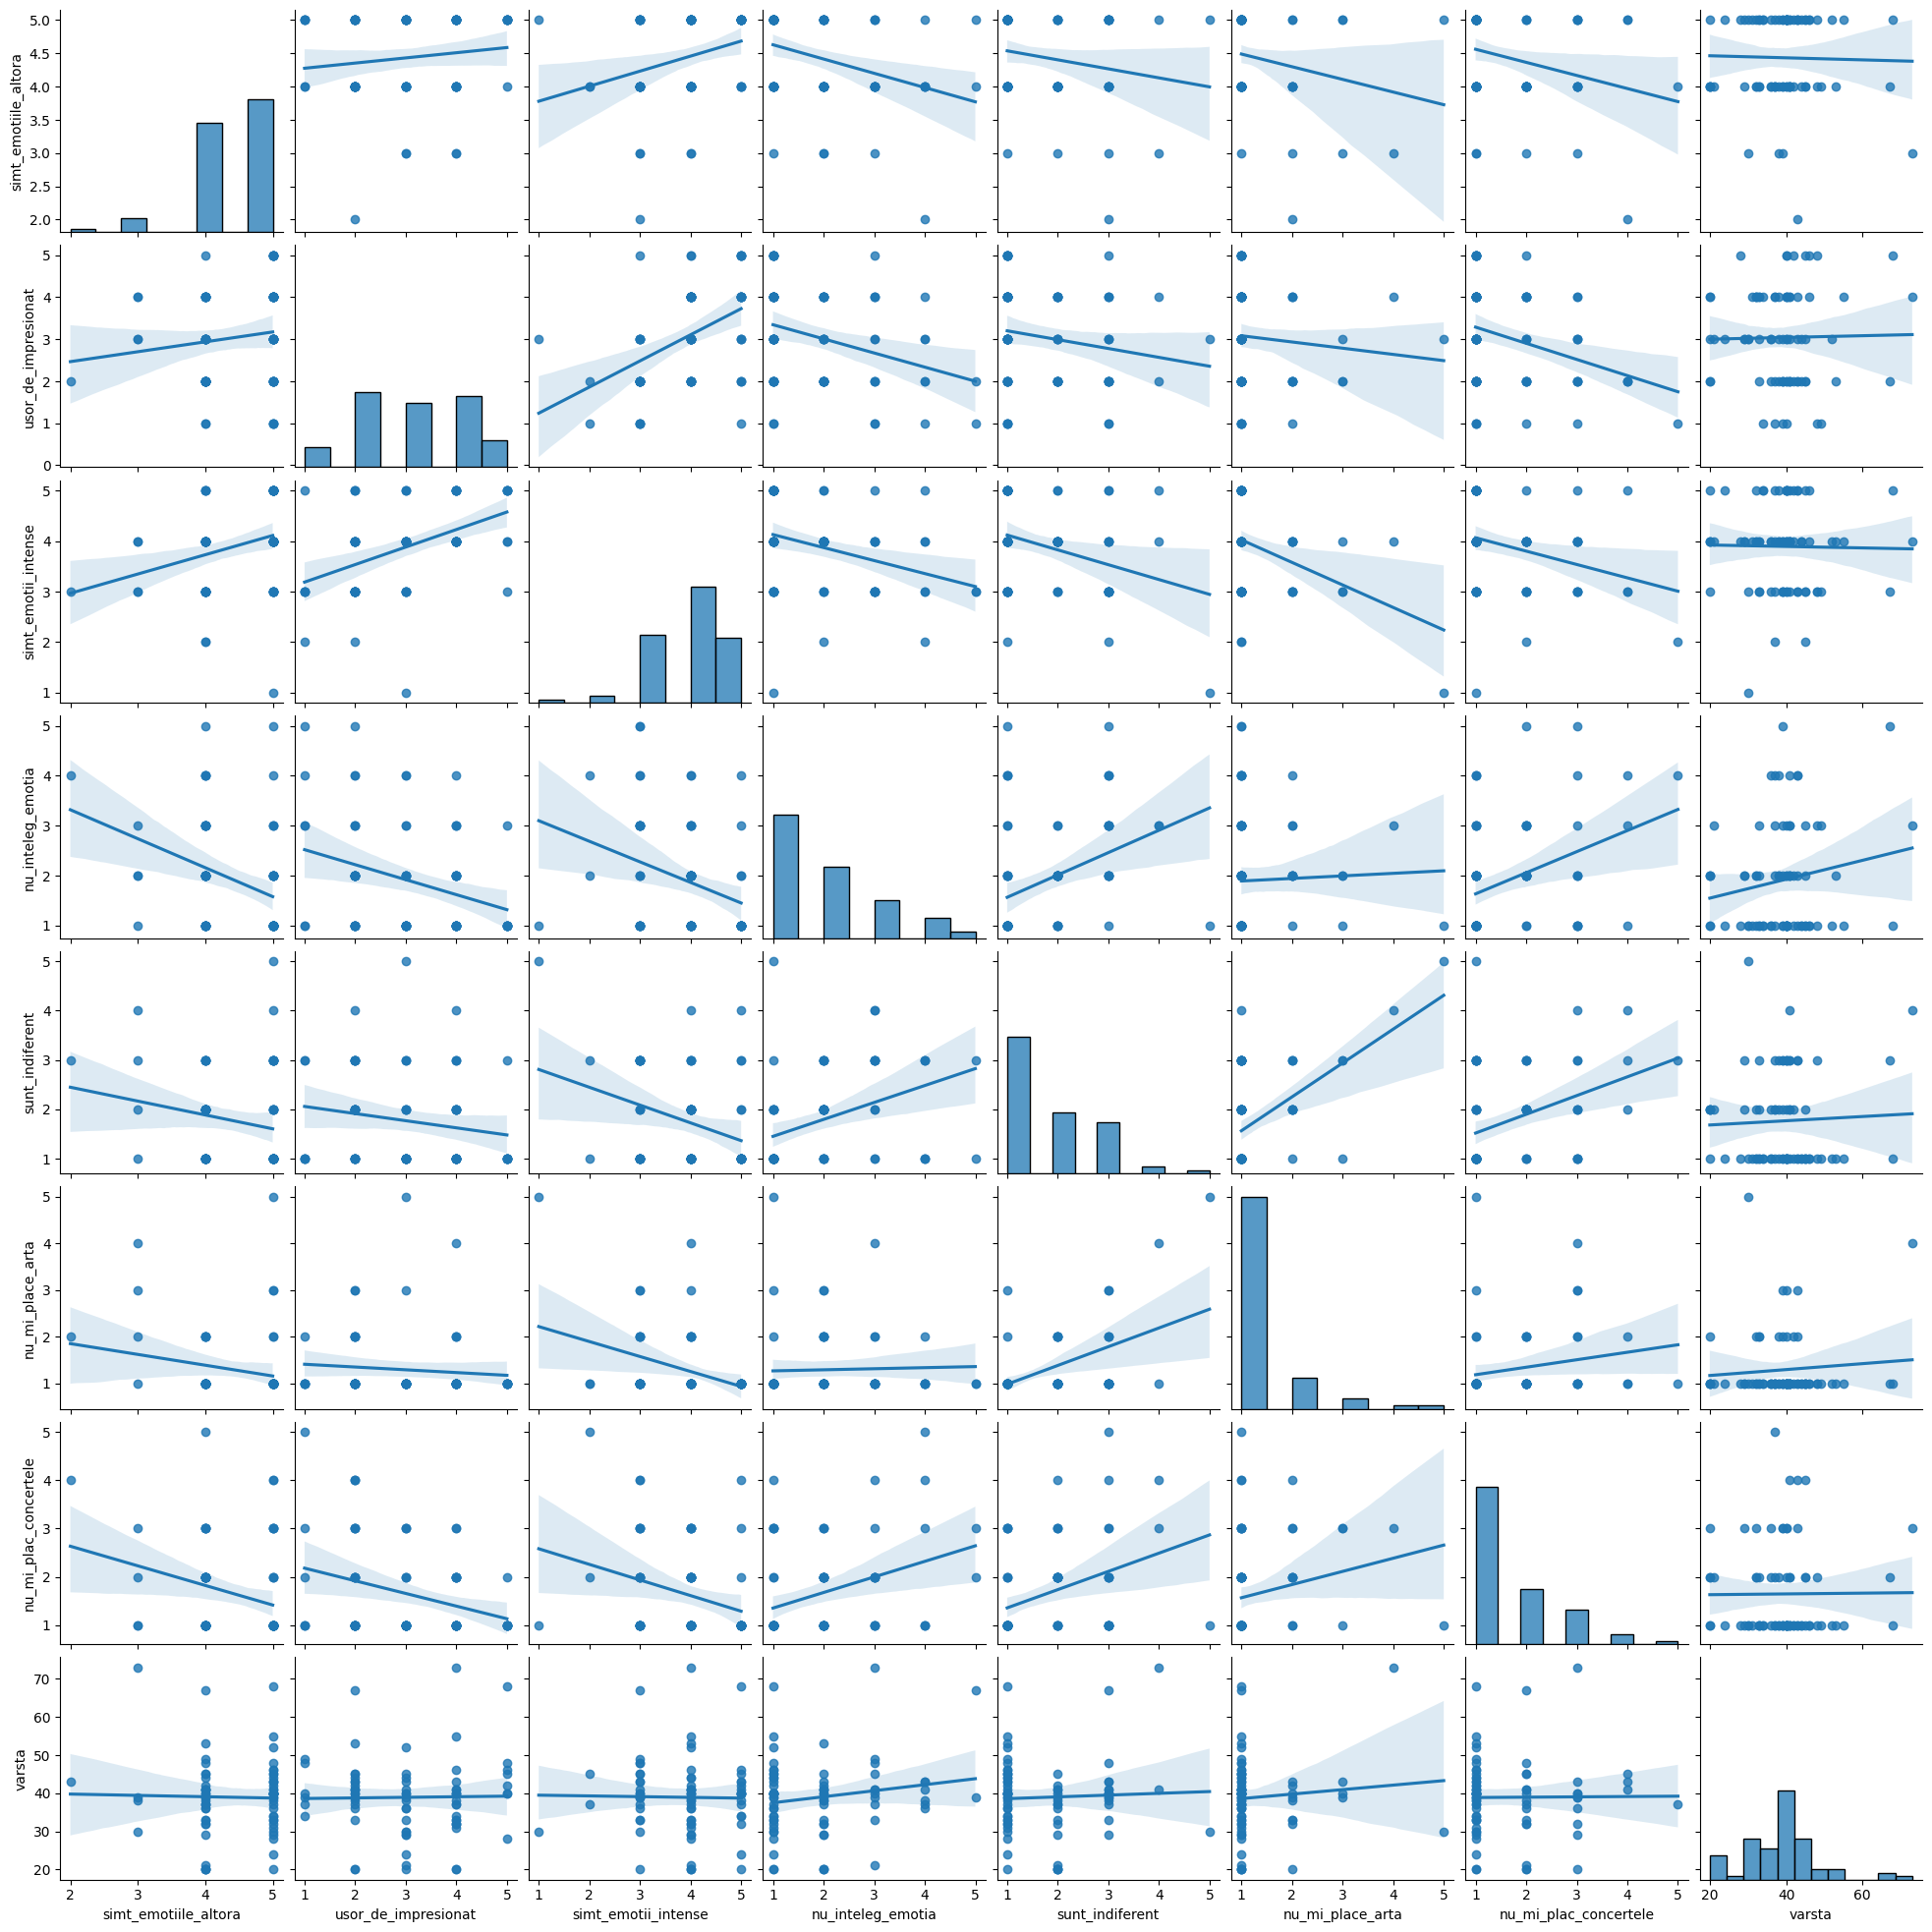

In [41]:
sns.pairplot(df2[['simt_emotiile_altora', 
                 'usor_de_impresionat', 
                 'simt_emotii_intense', 
                 'nu_inteleg_emotia', 
                 'sunt_indiferent', 
                 'nu_mi_place_arta', 
                 'nu_mi_plac_concertele', 
                 'varsta']], kind="reg")

In [80]:
X = df2[['simt_emotiile_altora', 'sufar_de_necazul_altora', 'miscat_de_necazul_altora']]
y = df2['plang_usor']
X.shape, y.shape

((76, 3), (76,))

In [81]:
X1 = df2[['sunt_indiferent', 'nu_mi_place_arta', 'nu_mi_plac_concertele']]
y1 = df2['varsta']
X1.shape, y1.shape

((76, 3), (76,))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)

In [84]:
lin_reg = LinearRegression()
lin_reg1 = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg1.fit(X1_train, y1_train)

LinearRegression()

In [85]:
y_pred_train = lin_reg.predict(X_train)  
y_pred_test = lin_reg.predict(X_test)  

In [86]:
y1_pred_train = lin_reg1.predict(X1_train)  
y1_pred_test = lin_reg1.predict(X1_test)  

In [87]:
print('R2_score for train data is:' + '{:.2}'.format(r2_score(y_train, y_pred_train)))
print("MSE score for train set: " +"{:.2}".format(mean_squared_error(y_train, y_pred_train)))
print('R2_score for test data is:' + '{:.2}'.format(r2_score(y_test, y_pred_test)))
print("MSE score for test set: " +"{:.2}".format(mean_squared_error(y_test, y_pred_test)))

R2_score for train data is:0.14
MSE score for train set: 1.6
R2_score for test data is:-0.23
MSE score for test set: 1.9


In [88]:
print('R2_score for train1 data is:' + '{:.2}'.format(r2_score(y1_train, y1_pred_train)))
print("MSE score for train1 set: " +"{:.2}".format(mean_squared_error(y1_train, y1_pred_train)))
print('R2_score for test1 data is:' + '{:.2}'.format(r2_score(y1_test, y1_pred_test)))
print("MSE score for test1 set: " +"{:.2}".format(mean_squared_error(y1_test, y1_pred_test)))

R2_score for train1 data is:0.048
MSE score for train1 set: 1.1e+02
R2_score for test1 data is:-1.9
MSE score for test1 set: 6.3e+01


In [89]:
poly_reg = PolynomialFeatures(degree = 5)
transform_poly_train = poly_reg.fit_transform(X_train)
transform_poly_train1 = poly_reg.fit_transform(X1_train)

regpoly = LinearRegression()
regpoly1 = LinearRegression()
regpoly.fit(transform_poly_train, y_train)
regpoly1.fit(transform_poly_train1, y1_train)

LinearRegression()

In [90]:
transform_poly_test = poly_reg.fit_transform(X_test)
polynomial_predict_test = regpoly.predict(transform_poly_test)
transform_poly_test1 = poly_reg.fit_transform(X1_test)
polynomial_predict_test1 = regpoly1.predict(transform_poly_test1)

In [91]:
print("R2 Score for Test set: " +"{:.2}".format(r2_score(y_test, polynomial_predict_test)))
print("MSE Score for Test set: " +"{:.2}".format(mean_squared_error(y_test, polynomial_predict_test)))

print("R2 Score for Test set: " +"{:.2}".format(r2_score(y1_test, polynomial_predict_test1)))
print("MSE Score for Test set: " +"{:.2}".format(mean_squared_error(y1_test, polynomial_predict_test1)))

R2 Score for Test set: -2.7
MSE Score for Test set: 5.7
R2 Score for Test set: -4.2e+03
MSE Score for Test set: 9.1e+04


In [92]:
decision_tree= tree.DecisionTreeRegressor(min_samples_split = 5)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)

decision_tree.fit(X1_train, y1_train)
y_predict1 = decision_tree.predict(X1_test)

In [93]:
print("R2 Score for Test set: " +"{:.2}".format(r2_score(y_test, y_predict)))
print("MSE Score for Test set: " +"{:.2}".format(mean_squared_error(y_test, y_predict)))

print("R2 Score for Test set: " +"{:.2}".format(r2_score(y1_test, y_predict1)))
print("MSE Score for Test set: " +"{:.2}".format(mean_squared_error(y1_test, y_predict1)))

R2 Score for Test set: -0.37
MSE Score for Test set: 2.1
R2 Score for Test set: -5.8
MSE Score for Test set: 1.5e+02


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   simt_emotiile_altora            76 non-null     int64 
 1   sufar_de_necazul_altora         76 non-null     int64 
 2   miscat_de_necazul_altora        76 non-null     int64 
 3   usor_de_impresionat             76 non-null     int64 
 4   plang_usor                      76 non-null     int64 
 5   simt_emotii_intense             76 non-null     int64 
 6   conectat_spiritual_cu_altii     76 non-null     int64 
 7   nu_inteleg_emotia               76 non-null     int64 
 8   sunt_indiferent                 76 non-null     int64 
 9   rar_sunt_emotional              76 non-null     int64 
 10  cred_in_arta                    76 non-null     int64 
 11  love_music                      76 non-null     int64 
 12  geasesc_frumusete_in_orice      76 non-null     int6

In [95]:
#dir(X_train)
X_train.dtypes

simt_emotiile_altora        int64
sufar_de_necazul_altora     int64
miscat_de_necazul_altora    int64
dtype: object

In [97]:
y_train.dtypes

dtype('int64')

In [98]:
'''vizd = dtreeviz(decision_tree,
               X_train,
               y_train,
               target_name = 'varsta',  # this name will be displayed at the leaf node
               feature_names=['simt_emotiile_altora', 'simt_emotii_intense', 'usor_de_impresionat'],
               title="......",
               fontname="Arial",
               title_fontsize=20,
               colors = {"title":"purple"}
              )
vizd '''

'vizd = dtreeviz(decision_tree,\n               X_train,\n               y_train,\n               target_name = \'varsta\',  # this name will be displayed at the leaf node\n               feature_names=[\'simt_emotiile_altora\', \'simt_emotii_intense\', \'usor_de_impresionat\'],\n               title="......",\n               fontname="Arial",\n               title_fontsize=20,\n               colors = {"title":"purple"}\n              )\nvizd '

In [101]:
# declare feature vector and target variable
X = df2.drop(['venit'], axis = 1)
y = df2.venit

In [102]:
knn = neighbors.KNeighborsClassifier()

In [103]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

C:\Users\lacra\Envs\curs_python\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lacra\Envs\curs_python\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [107]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.125

In [108]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.48333333333333334

In [109]:
confusion_matrix(y_test, y_pred)

array([[1, 1, 0, 0, 0],
       [2, 0, 1, 0, 0],
       [0, 1, 0, 0, 1],
       [2, 2, 2, 0, 1],
       [0, 0, 1, 0, 1]], dtype=int64)

In [ ]:
randomforest = RandomForestClassifier()